In [7]:
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from helper_files.plotting_functions import get_opponent_df, generate_fv_grid, plot_heatmap, generate_cp_grid

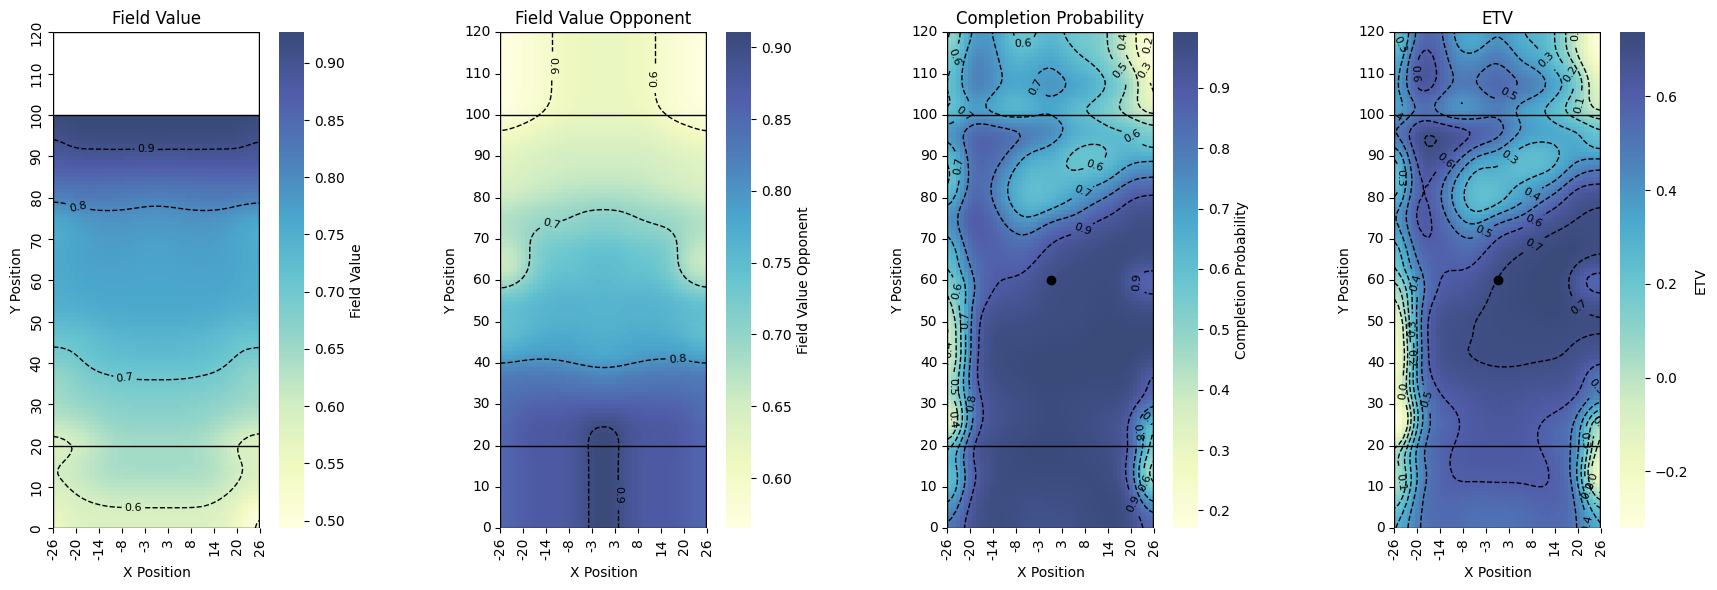

In [8]:
models = joblib.load('../data/models/models_squared.jblb')
defaults = {'possession_num':1, 'possession_throw':4,'game_quarter':1, 'quarter_point':1,'score_diff':0,'times':3}
sigma = 3
thrower_x, thrower_y = 25, 60
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

fv_grid = generate_fv_grid(-26.66, 26.67, 0, 100, 50, 100, default_columns=defaults)[models['fv_features']]
fv = plot_heatmap(models['fv_model']['model'], fv_grid, 50, 100, title='Field Value', scaler=models['fv_model']['scaler'], sigma=sigma, ax=axes[0])

cp_grid = generate_cp_grid(thrower_x=thrower_x, thrower_y=thrower_y, default_columns=defaults)[models['cp_features']]
cp = plot_heatmap(models['cp_model']['model'], cp_grid[models['cp_model']['features']], 50, 120, title='Completion Probability', scaler=models['cp_model']['scaler'], sigma=sigma, ax=axes[2], highlight_point=(thrower_x, thrower_y))

opponent_df = get_opponent_df(cp_grid)[models['fv_features']]
fv_opponent = plot_heatmap(models['fv_model']['model'], opponent_df, 50, 120, title='Field Value Opponent', scaler=models['fv_model']['scaler'], sigma=sigma, ax=axes[1])

etv = models['etv_model'].predict(cp_grid).reshape(120,50)
plot_heatmap(None, etv, 50, 120, title='ETV', sigma=sigma, ax=axes[3], highlight_point=(thrower_x, thrower_y))
plt.tight_layout()
plt.show()


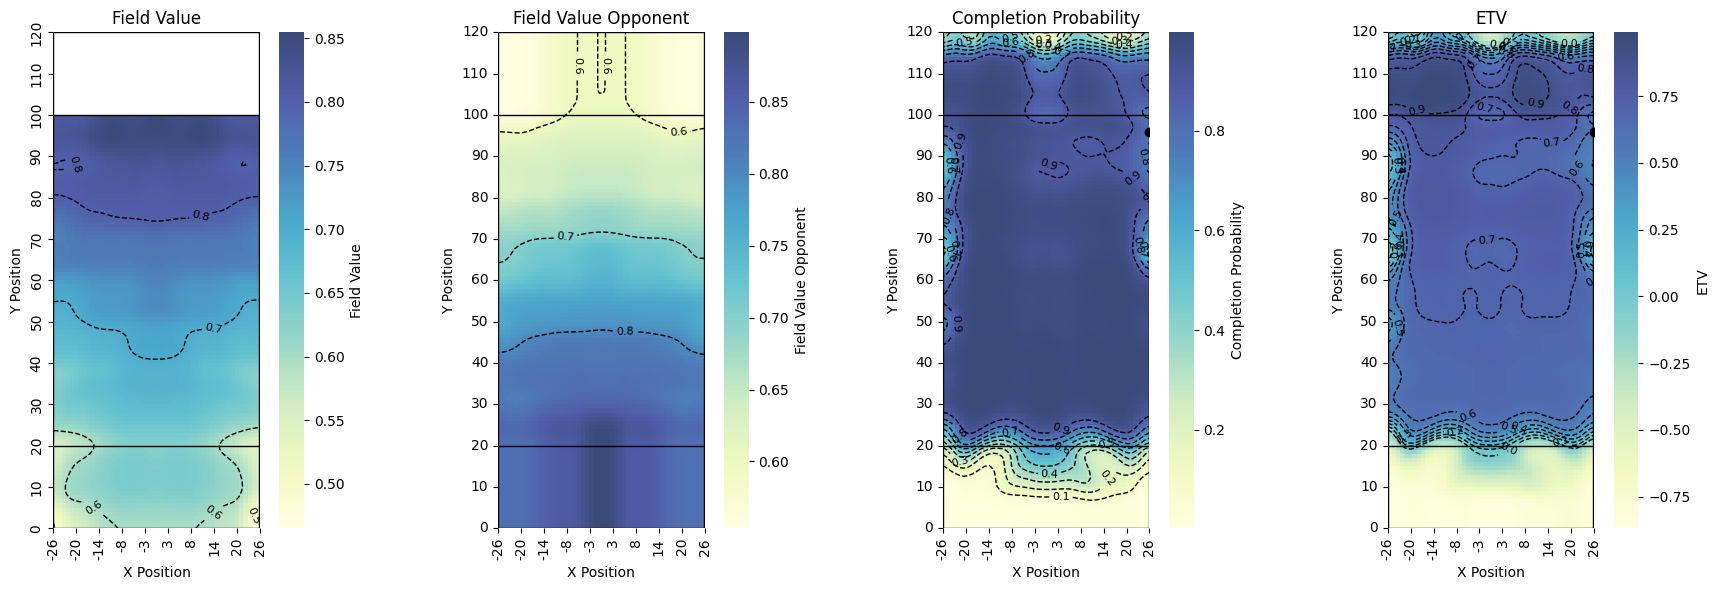

In [14]:
defaults = {'possession_num':1, 'possession_throw':1,'game_quarter':1, 'quarter_point':1,'score_diff':0,'times':10}
sigma = 2
thrower_x, thrower_y = 50, 96
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

fv_grid = generate_fv_grid(-26.66, 26.67, 0, 100, 50, 100, default_columns=defaults)[models['fv_features']]
fv = plot_heatmap(models['fv_model']['model'], fv_grid, 50, 100, title='Field Value', scaler=models['fv_model']['scaler'], sigma=sigma, ax=axes[0])

cp_grid = generate_cp_grid(thrower_x=thrower_x, thrower_y=thrower_y, default_columns=defaults)[models['cp_features']]
cp = plot_heatmap(models['cp_model']['model'], cp_grid[models['cp_model']['features']], 50, 120, title='Completion Probability', scaler=models['cp_model']['scaler'], sigma=sigma, ax=axes[2], highlight_point=(thrower_x, thrower_y))

opponent_df = get_opponent_df(cp_grid)[models['fv_features']]
fv_opponent = plot_heatmap(models['fv_model']['model'], opponent_df, 50, 120, title='Field Value Opponent', scaler=models['fv_model']['scaler'], sigma=sigma, ax=axes[1])

etv = models['etv_model'].predict(cp_grid).reshape(120,50)
plot_heatmap(None, etv, 50, 120, title='ETV', sigma=sigma, ax=axes[3], highlight_point=(thrower_x, thrower_y))
plt.tight_layout()
plt.show()


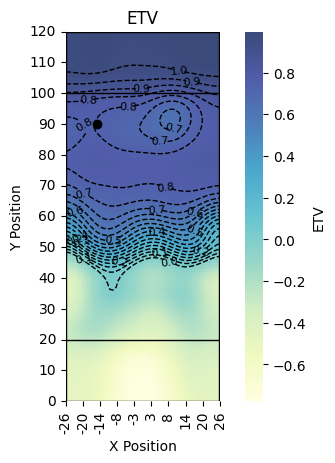

In [12]:
defaults = {'possession_num':1, 'possession_throw':4,'game_quarter':1, 'quarter_point':1,'score_diff':0,'times':12}
sigma = 5
thrower_x, thrower_y = 10, 90
cp_grid = generate_cp_grid(thrower_x=thrower_x, thrower_y=thrower_y, default_columns=defaults)
etv = models['etv_model'].predict(cp_grid).reshape(120,50)
_ = plot_heatmap(None, etv, 50, 120, title='ETV', sigma=sigma, highlight_point=(thrower_x, thrower_y), contour_every=0.05)